In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt

# # # Load data and set directory

In [2]:
#Setting directory and read csv output from the GEE
belmontdir = "C:/Users/Nazia/Documents/OSU/Belmont/PlotData/"
doyNTL_allgrid3 = "allNTL_allgrid3_props.csv" 
df_allntl = pd.read_csv(belmontdir + doyNTL_allgrid3)

In [3]:
df_allntl.columns

Index(['settl_pcod', 'NTLmean', 'YYYY_MM_DD'], dtype='object')

In [4]:
print(df_allntl)

            settl_pcod   NTLmean  YYYY_MM_DD
0        MG11117000035  0.164565  2012-01-19
1        MG11117000050  0.177991  2012-01-19
2        MG11117000070  0.139347  2012-01-19
3        MG11117000080  0.124084  2012-01-19
4        MG11117000081  0.149829  2012-01-19
...                ...       ...         ...
2886760  MG72716000003  2.634741  2023-12-30
2886761  MG72716000206  0.215901  2023-12-30
2886762  MG72716000242  0.300109  2023-12-30
2886763  MG72716000429  0.683501  2023-12-30
2886764  MG72716000438  0.219506  2023-12-30

[2886765 rows x 3 columns]


In [5]:
# Convert 'YYYY_MM_DD' column to datetime
df_allntl['YYYY_MM_DD'] = pd.to_datetime(df_allntl['YYYY_MM_DD'])

# Display the first few rows to verify the conversion
print(df_allntl.head())


      settl_pcod   NTLmean YYYY_MM_DD
0  MG11117000035  0.164565 2012-01-19
1  MG11117000050  0.177991 2012-01-19
2  MG11117000070  0.139347 2012-01-19
3  MG11117000080  0.124084 2012-01-19
4  MG11117000081  0.149829 2012-01-19


In [6]:
# Pivot the table
df_date = df_allntl.pivot(index='settl_pcod', columns='YYYY_MM_DD', values='NTLmean')

# Save the modified DataFrame to a CSV file
output_file = belmontdir + "allNTL_allgrid3_datetime.csv"
df_date.to_csv(output_file, index=True)  # Set index=True to include 'settl_pcod' in the CSV

In [7]:
print(df_date.index.name)

settl_pcod


In [8]:
print(df_date.columns)

DatetimeIndex(['2012-01-19', '2012-01-20', '2012-01-21', '2012-01-22',
               '2012-01-23', '2012-01-24', '2012-01-25', '2012-01-26',
               '2012-01-27', '2012-01-28',
               ...
               '2023-12-21', '2023-12-22', '2023-12-23', '2023-12-24',
               '2023-12-25', '2023-12-26', '2023-12-27', '2023-12-28',
               '2023-12-29', '2023-12-30'],
              dtype='datetime64[ns]', name='YYYY_MM_DD', length=4341, freq=None)


In [9]:
print(df_date.index)

Index(['MG00000000032', 'MG00000000033', 'MG00000000037', 'MG00000000038',
       'MG11000000001', 'MG11000000005', 'MG11000000013', 'MG11000000022',
       'MG11000000030', 'MG11000000034',
       ...
       'MG72712000205', 'MG72712000225', 'MG72712000227', 'MG72716000001',
       'MG72716000002', 'MG72716000003', 'MG72716000206', 'MG72716000242',
       'MG72716000429', 'MG72716000438'],
      dtype='object', name='settl_pcod', length=665)


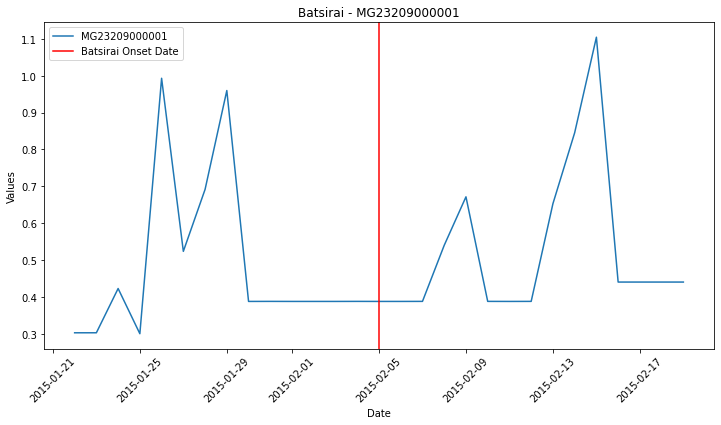

In [10]:
# Define the settlement as 'grid3'
grid3 = 'MG23209000001'

# Select the range of dates
post_start_date = '2015-01-22'  #2 weeks before Batsirai
post_end_date = pd.to_datetime(post_start_date) + pd.Timedelta(days=28)
date_range = pd.date_range(start=post_start_date, end=post_end_date)

# Check if 'grid3' value is in the DataFrame index and plot the data for it
if grid3 in df_date.index:
    # Extract the row for 'grid3'
    specific_row = df_date.loc[grid3, date_range]

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(date_range, specific_row, label=grid3)

    plt.title(f'Batsirai - {grid3}')
    plt.xlabel('Date')
    plt.ylabel('Values')
    plt.xticks(rotation=45)
    plt.axvline(x=pd.to_datetime('2015-02-05'), color='r', linestyle='-', label='Batsirai Onset Date')
    plt.legend()
    plt.show()
else:
    print(f"Row with '{grid3}' not found.")


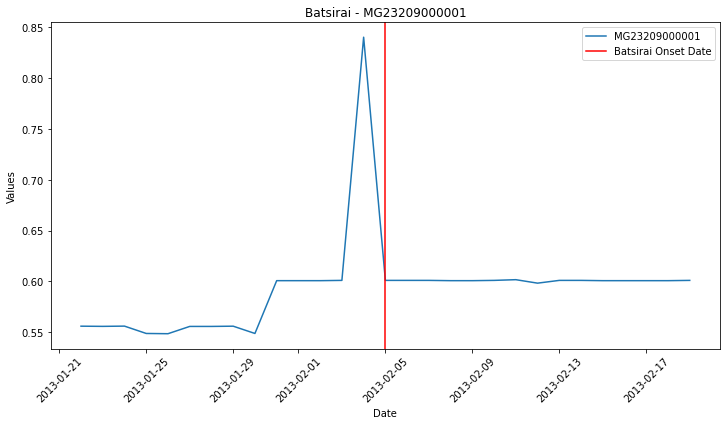

In [11]:
# Define the settlement as 'grid3'
grid3 = 'MG23209000001'

# Select the range of dates
post_start_date = '2013-01-22'  #2 weeks before Batsirai Historic date
post_end_date = pd.to_datetime(post_start_date) + pd.Timedelta(days=28)
date_range = pd.date_range(start=post_start_date, end=post_end_date)

# # Convert the date_range to a list of strings matching the format of the column names
# formatted_date_range = [date.strftime('%Y-%m-%d') for date in date_range]

# Check if 'grid3' value is in the DataFrame index and plot the data for it
if grid3 in df_date.index:
    # Extract the row for 'grid3'
    specific_row = df_date.loc[grid3, date_range]

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(date_range, specific_row, label=grid3)

    plt.title(f'Batsirai - {grid3}')
    plt.xlabel('Date')
    plt.ylabel('Values')
    plt.xticks(rotation=45)
    plt.axvline(x=pd.to_datetime('2013-02-05'), color='r', linestyle='-', label='Batsirai Onset Date')
    plt.legend()
    plt.show()
else:
    print(f"Row with '{grid3}' not found.")


## Normalized difference in NTL two weeks after the cyclone onset

### Historical Pre and Post average value for Batsirai

In [12]:
# Define the date ranges
hist_pre_start_date = '2012-01-19'
hist_pre_end_date = '2012-02-04'
hist_post_start_date = '2012-02-05'
hist_post_end_date = '2012-02-17'

# Initialize an empty DataFrame to store the results
result_df = pd.DataFrame(index=df_date.index)

# Loop over each year before 2022
for year in range(2012, 2022):
    # Create a boolean mask for the desired pre and post date ranges for the current year
    pre_date_mask_range = pd.date_range(start=f"{year}-01-19", end=f"{year}-02-04")
    post_date_mask_range = pd.date_range(start=f"{year}-02-05", end=f"{year}-02-17")

    # Apply the mask to filter the relevant columns for pre and post date ranges
    pre_filtered_dates = df_date.columns[df_date.columns.isin(pre_date_mask_range)]
    post_filtered_dates = df_date.columns[df_date.columns.isin(post_date_mask_range)]

    # Calculate the mean for the filtered pre and post date ranges
    if not pre_filtered_dates.empty:
        hist_pre_average_values = df_date[pre_filtered_dates].mean(axis=1)
    else:
        print(f"No data available for the specified pre date range in {year}.")
        hist_pre_average_values = pd.Series([float('nan')] * len(df_date), index=df_date.index)

    if not post_filtered_dates.empty:
        hist_post_average_values = df_date[post_filtered_dates].mean(axis=1)
    else:
        print(f"No data available for the specified post date range in {year}.")
        hist_post_average_values = pd.Series([float('nan')] * len(df_date), index=df_date.index)

    # Add pre and post values as new columns to the result DataFrame
    result_df[f'hist_pre_bat_average_values_{year}'] = hist_pre_average_values
    result_df[f'hist_post_bat_average_values_{year}'] = hist_post_average_values

# Create updated_results_df with all pre and post values
updated_results_df = result_df.copy()

# Display the updated DataFrame
print(updated_results_df.head(10))



               hist_pre_bat_average_values_2012  \
settl_pcod                                        
MG00000000032                          0.531537   
MG00000000033                          0.584532   
MG00000000037                          0.194619   
MG00000000038                          0.245385   
MG11000000001                          0.370864   
MG11000000005                          0.181133   
MG11000000013                          0.567650   
MG11000000022                          0.227471   
MG11000000030                          0.237819   
MG11000000034                          3.280717   

               hist_post_bat_average_values_2012  \
settl_pcod                                         
MG00000000032                           0.424614   
MG00000000033                           0.547464   
MG00000000037                           0.153338   
MG00000000038                           0.239618   
MG11000000001                           0.310061   
MG11000000005          

In [13]:
# Display the updated DataFrame
print(updated_results_df.columns)  # Print the first few rows for a quick check

Index(['hist_pre_bat_average_values_2012', 'hist_post_bat_average_values_2012',
       'hist_pre_bat_average_values_2013', 'hist_post_bat_average_values_2013',
       'hist_pre_bat_average_values_2014', 'hist_post_bat_average_values_2014',
       'hist_pre_bat_average_values_2015', 'hist_post_bat_average_values_2015',
       'hist_pre_bat_average_values_2016', 'hist_post_bat_average_values_2016',
       'hist_pre_bat_average_values_2017', 'hist_post_bat_average_values_2017',
       'hist_pre_bat_average_values_2018', 'hist_post_bat_average_values_2018',
       'hist_pre_bat_average_values_2019', 'hist_post_bat_average_values_2019',
       'hist_pre_bat_average_values_2020', 'hist_post_bat_average_values_2020',
       'hist_pre_bat_average_values_2021',
       'hist_post_bat_average_values_2021'],
      dtype='object')


### Historical Pre and Post average value for Batsirai

In [14]:
# Define the date ranges for 2022
bat_pre_start_date = '2022-01-19'
bat_pre_end_date = '2022-02-04'
bat_post_start_date = '2022-02-05'
bat_post_end_date = '2022-02-17'

# Initialize an empty DataFrame to store the results
temp_df = pd.DataFrame(index=df_date.index)

# Create a boolean mask for the desired pre and post date ranges for the year 2022
pre_date_mask_range = pd.date_range(start=bat_pre_start_date, end=bat_pre_end_date)
post_date_mask_range = pd.date_range(start=bat_post_start_date, end=bat_post_end_date)

# Apply the mask to filter the relevant columns for pre and post date ranges
pre_filtered_dates = df_date.columns[df_date.columns.isin(pre_date_mask_range)]
post_filtered_dates = df_date.columns[df_date.columns.isin(post_date_mask_range)]

# Calculate the mean for the filtered pre and post date ranges
if not pre_filtered_dates.empty:
    bat_pre_average_values = df_date[pre_filtered_dates].mean(axis=1)
else:
    print("No data available for the specified pre date range in 2022.")
    bat_pre_average_values = pd.Series([float('nan')] * len(df_date), index=df_date.index)

if not post_filtered_dates.empty:
    bat_post_average_values = df_date[post_filtered_dates].mean(axis=1)
else:
    print("No data available for the specified post date range in 2022.")
    bat_post_average_values = pd.Series([float('nan')] * len(df_date), index=df_date.index)

# Add pre and post values as new columns to the updated_results_df DataFrame
updated_results_df['pre_bat_average_values_2022'] = bat_pre_average_values
updated_results_df['post_bat_average_values_2022'] = bat_post_average_values

# Display the updated DataFrame
print(updated_results_df.head(10))

               hist_pre_bat_average_values_2012  \
settl_pcod                                        
MG00000000032                          0.531537   
MG00000000033                          0.584532   
MG00000000037                          0.194619   
MG00000000038                          0.245385   
MG11000000001                          0.370864   
MG11000000005                          0.181133   
MG11000000013                          0.567650   
MG11000000022                          0.227471   
MG11000000030                          0.237819   
MG11000000034                          3.280717   

               hist_post_bat_average_values_2012  \
settl_pcod                                         
MG00000000032                           0.424614   
MG00000000033                           0.547464   
MG00000000037                           0.153338   
MG00000000038                           0.239618   
MG11000000001                           0.310061   
MG11000000005          

In [15]:
# Display the updated DataFrame
print(updated_results_df.columns)  # Print the first few rows for a quick check

Index(['hist_pre_bat_average_values_2012', 'hist_post_bat_average_values_2012',
       'hist_pre_bat_average_values_2013', 'hist_post_bat_average_values_2013',
       'hist_pre_bat_average_values_2014', 'hist_post_bat_average_values_2014',
       'hist_pre_bat_average_values_2015', 'hist_post_bat_average_values_2015',
       'hist_pre_bat_average_values_2016', 'hist_post_bat_average_values_2016',
       'hist_pre_bat_average_values_2017', 'hist_post_bat_average_values_2017',
       'hist_pre_bat_average_values_2018', 'hist_post_bat_average_values_2018',
       'hist_pre_bat_average_values_2019', 'hist_post_bat_average_values_2019',
       'hist_pre_bat_average_values_2020', 'hist_post_bat_average_values_2020',
       'hist_pre_bat_average_values_2021', 'hist_post_bat_average_values_2021',
       'pre_bat_average_values_2022', 'post_bat_average_values_2022'],
      dtype='object')


In [16]:
# Select columns with the prefix 'hist_pre_bat_average_values'
pre_columns = updated_results_df.filter(like='hist_pre_bat_average_values').columns

# Calculate the mean along the rows for the selected columns
mean_pre_values = updated_results_df[pre_columns].mean(axis=1)

# Add the mean values as a new column to the updated_results_df
updated_results_df['mean_hist_pre_bat_average_values'] = mean_pre_values

# Display the updated DataFrame
print(updated_results_df.head())


               hist_pre_bat_average_values_2012  \
settl_pcod                                        
MG00000000032                          0.531537   
MG00000000033                          0.584532   
MG00000000037                          0.194619   
MG00000000038                          0.245385   
MG11000000001                          0.370864   

               hist_post_bat_average_values_2012  \
settl_pcod                                         
MG00000000032                           0.424614   
MG00000000033                           0.547464   
MG00000000037                           0.153338   
MG00000000038                           0.239618   
MG11000000001                           0.310061   

               hist_pre_bat_average_values_2013  \
settl_pcod                                        
MG00000000032                          0.521945   
MG00000000033                          0.642616   
MG00000000037                          0.241822   
MG00000000038         

In [17]:
# Select columns with the prefix 'hist_pre_bat_average_values'
post_columns = updated_results_df.filter(like='hist_post_bat_average_values').columns

# Calculate the mean along the rows for the selected columns
mean_post_values = updated_results_df[pre_columns].mean(axis=1)

# Add the mean values as a new column to the updated_results_df
updated_results_df['mean_hist_post_bat_average_values'] = mean_post_values

# Display the updated DataFrame
print(updated_results_df.head())

               hist_pre_bat_average_values_2012  \
settl_pcod                                        
MG00000000032                          0.531537   
MG00000000033                          0.584532   
MG00000000037                          0.194619   
MG00000000038                          0.245385   
MG11000000001                          0.370864   

               hist_post_bat_average_values_2012  \
settl_pcod                                         
MG00000000032                           0.424614   
MG00000000033                           0.547464   
MG00000000037                           0.153338   
MG00000000038                           0.239618   
MG11000000001                           0.310061   

               hist_pre_bat_average_values_2013  \
settl_pcod                                        
MG00000000032                          0.521945   
MG00000000033                          0.642616   
MG00000000037                          0.241822   
MG00000000038         

In [18]:
# Calculate the percent difference
updated_results_df['hist_percent_difference'] = ((updated_results_df['mean_hist_post_bat_average_values'] - updated_results_df['mean_hist_pre_bat_average_values']) / updated_results_df['mean_hist_pre_bat_average_values']) * 100 

# Display the updated DataFrame
print(updated_results_df.head())


               hist_pre_bat_average_values_2012  \
settl_pcod                                        
MG00000000032                          0.531537   
MG00000000033                          0.584532   
MG00000000037                          0.194619   
MG00000000038                          0.245385   
MG11000000001                          0.370864   

               hist_post_bat_average_values_2012  \
settl_pcod                                         
MG00000000032                           0.424614   
MG00000000033                           0.547464   
MG00000000037                           0.153338   
MG00000000038                           0.239618   
MG11000000001                           0.310061   

               hist_pre_bat_average_values_2013  \
settl_pcod                                        
MG00000000032                          0.521945   
MG00000000033                          0.642616   
MG00000000037                          0.241822   
MG00000000038         

In [19]:
# Calculate the percent difference
updated_results_df['bat_percent_difference'] = ((updated_results_df['post_bat_average_values_2022'] - updated_results_df['pre_bat_average_values_2022']) / updated_results_df['pre_bat_average_values_2022']) * 100 

# Display the updated DataFrame
print(updated_results_df.head())

               hist_pre_bat_average_values_2012  \
settl_pcod                                        
MG00000000032                          0.531537   
MG00000000033                          0.584532   
MG00000000037                          0.194619   
MG00000000038                          0.245385   
MG11000000001                          0.370864   

               hist_post_bat_average_values_2012  \
settl_pcod                                         
MG00000000032                           0.424614   
MG00000000033                           0.547464   
MG00000000037                           0.153338   
MG00000000038                           0.239618   
MG11000000001                           0.310061   

               hist_pre_bat_average_values_2013  \
settl_pcod                                        
MG00000000032                          0.521945   
MG00000000033                          0.642616   
MG00000000037                          0.241822   
MG00000000038         